# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from datetime import datetime
import warnings
# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
column_names = ["City","Country"]
cities_df = pd.DataFrame(columns=column_names)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
for x in range(1000):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df

,index,City,Country
0,0,rikitea,pf
1,1,saskylakh,ru
2,2,mataura,pf
3,3,yerofey pavlovich,ru
4,4,chokurdakh,ru
5,5,busselton,au
6,6,bambous virieux,mu
7,7,tumannyy,ru
8,8,arraial do cabo,br
9,9,kodiak,us


<style> .dataframe thead tr:only-child th { text-align: right; } 
.dataframe thead th {
    text-align: left;
}

.dataframe tbody tr th {
    vertical-align: top;
}
</style>

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
more_columns = ["Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
new_cities_df = pd.DataFrame(columns=more_columns)
# Build the endpoint URLs
weather_url = "http://api.openweathermap.org/data/2.5/weather"
warnings.simplefilter(action='ignore', category=FutureWarning)
counter = 1
print("Beginning Data Retrieval")
for index, city in cities_df.iterrows():
    target_city = city["City"]
    params = {"appid": api_key ,"units": "metric", "q": target_city}
    response = requests.get(weather_url,params)
    city_json = requests.get(response.url).json()
    if city_json["cod"] == "404":
        print("City not found, skipping...")

    else:
        new_cities_df.set_value(index, "City", city_json["name"])
        new_cities_df.set_value(index, "Country", city_json["sys"]["country"])
        new_cities_df.set_value(index, "Date", datetime.fromtimestamp(city_json["dt"]))
        new_cities_df.set_value(index, "Max Temp", city_json["main"]["temp"])
        new_cities_df.set_value(index, "Lat", city_json["coord"]["lat"])
        new_cities_df.set_value(index, "Lng", city_json["coord"]["lon"])
        new_cities_df.set_value(index, "Humidity", city_json["main"]["humidity"])
        new_cities_df.set_value(index, "Cloudiness", city_json["clouds"]["all"])
        new_cities_df.set_value(index, "Wind Speed", city_json["wind"]["speed"])
        print("------------------------")
        print("Proceesing: City # " , counter, ' | ' , city_json["name"], city_json["sys"]["country"])
        print(response.url)
        counter += 1
    
    

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=rikitea
------------------------
Proceesing: City #  2  |  Saskylakh RU
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=saskylakh
------------------------
Proceesing: City #  3  |  Mataura NZ
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=mataura
------------------------
Proceesing: City #  4  |  Yerofey Pavlovich RU
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=yerofey+pavlovich
------------------------
Proceesing: City #  5  |  Chokurdakh RU
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=chokurdakh
------------------------
Proceesing: City #  6  |  Busselton AU
http://api.openweathermap.

------------------------
Proceesing: City #  47  |  Alofi NU
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=alofi
------------------------
Proceesing: City #  48  |  North Bend US
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=north+bend
------------------------
Proceesing: City #  49  |  Muroto JP
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=muroto
City not found, skipping...
------------------------
Proceesing: City #  50  |  Hermanus ZA
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=hermanus
------------------------
Proceesing: City #  51  |  Port Elizabeth US
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=port+elizabeth
------------------------
Proceesing: City #  52  |  Sisimiut GL
http://api.openweathermap.org/da

------------------------
Proceesing: City #  94  |  Souillac FR
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=souillac
------------------------
Proceesing: City #  95  |  Ponta do Sol BR
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=ponta+do+sol
------------------------
Proceesing: City #  96  |  East London ZA
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=east+london
------------------------
Proceesing: City #  97  |  Hilo US
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=hilo
------------------------
Proceesing: City #  98  |  Hurricane US
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=hurricane
------------------------
Proceesing: City #  99  |  Severo-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid

------------------------
Proceesing: City #  140  |  Hobyo SO
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=hobyo
------------------------
Proceesing: City #  141  |  Longyearbyen NO
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=longyearbyen
City not found, skipping...
------------------------
Proceesing: City #  142  |  Georgetown GY
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=georgetown
------------------------
Proceesing: City #  143  |  Salina US
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=salina
------------------------
Proceesing: City #  144  |  Margate AU
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=margate
------------------------
Proceesing: City #  145  |  Klaksvik FO
http://api.openweathermap.org/da

------------------------
Proceesing: City #  186  |  Wakkanai JP
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=wakkanai
City not found, skipping...
------------------------
Proceesing: City #  187  |  Kaman TR
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=kaman
------------------------
Proceesing: City #  188  |  Ancud CL
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=ancud
------------------------
Proceesing: City #  189  |  Trogir HR
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=trogir
------------------------
Proceesing: City #  190  |  Heihe RU
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=heihe
------------------------
Proceesing: City #  191  |  Aklavik CA
http://api.openweathermap.org/data/2.5/weather?appid=46

------------------------
Proceesing: City #  232  |  Fortuna ES
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=fortuna
------------------------
Proceesing: City #  233  |  Yaan NG
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=yaan
------------------------
Proceesing: City #  234  |  Clyde River CA
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=clyde+river
------------------------
Proceesing: City #  235  |  Westport IE
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=westport
------------------------
Proceesing: City #  236  |  Arman RU
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=arman
------------------------
Proceesing: City #  237  |  Great Yarmouth GB
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42b

------------------------
Proceesing: City #  279  |  Dickson US
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=dickson
------------------------
Proceesing: City #  280  |  Nuuk GL
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=nuuk
------------------------
Proceesing: City #  281  |  Esil KZ
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=esil
------------------------
Proceesing: City #  282  |  Berzence HR
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=berzence
------------------------
Proceesing: City #  283  |  Loiza PR
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=loiza
------------------------
Proceesing: City #  284  |  Kalispell US
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd0

------------------------
Proceesing: City #  325  |  Samarai PG
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=samarai
------------------------
Proceesing: City #  326  |  Tucupita VE
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=tucupita
------------------------
Proceesing: City #  327  |  Quang Ngai VN
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=quang+ngai
------------------------
Proceesing: City #  328  |  Sistranda NO
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=sistranda
------------------------
Proceesing: City #  329  |  Kamenka RU
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=kamenka
------------------------
Proceesing: City #  330  |  Kaeo NZ
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e4

------------------------
Proceesing: City #  371  |  Lagoa PT
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=lagoa
------------------------
Proceesing: City #  372  |  Kudymkar RU
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=kudymkar
------------------------
Proceesing: City #  373  |  Mocuba MZ
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=mocuba
------------------------
Proceesing: City #  374  |  Agadir MA
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=agadir
------------------------
Proceesing: City #  375  |  Pailon BO
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42bfee2c7410b8562bafd04b&units=metric&q=pailon
------------------------
Proceesing: City #  376  |  Santa Vitoria do Palmar BR
http://api.openweathermap.org/data/2.5/weather?appid=4609ea6e42

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
new_cities_df.count()
new_cities_df

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,City
0,64,CD,2019-01-11 20:25:27,100,-1.93,18.29,21.76,1.11,Inongo
1,92,GR,2019-01-11 20:25:27,100,40.1,23.98,6.81,8.31,Sarti
2,0,AR,2019-01-11 20:25:28,56,-38.31,-60.23,16.49,5.41,Barrow
3,12,TL,2019-01-11 20:25:28,66,-8.93,125.41,28.99,1.01,Airai
5,92,UY,2019-01-11 20:20:51,90,-33.69,-53.46,18.44,3.21,Chuy
6,75,CL,2019-01-11 20:00:00,100,-53.16,-70.91,7,12.3,Punta Arenas
7,24,RU,2019-01-11 20:25:29,46,68.75,161.3,-26.37,1.21,Cherskiy
8,90,US,2019-01-11 19:55:00,100,39.95,-94.76,0.5,2.6,Kodiak
9,0,PF,2019-01-11 20:23:32,100,-9.8,-139.03,27.49,7.26,Atuona
11,90,US,2019-01-11 20:15:00,77,27.1,-82.45,15.83,2.1,Venice


In [15]:
# Save data to a CSV file
new_cities_df.to_csv("City_Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

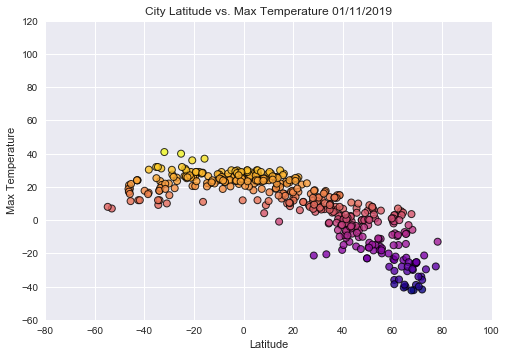

In [16]:
#Building a scatter plot for Latitude vs. Temperature

plt.scatter(new_cities_df["Lat"], new_cities_df["Max Temp"], c=new_cities_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",cmap='plasma', alpha=0.8, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

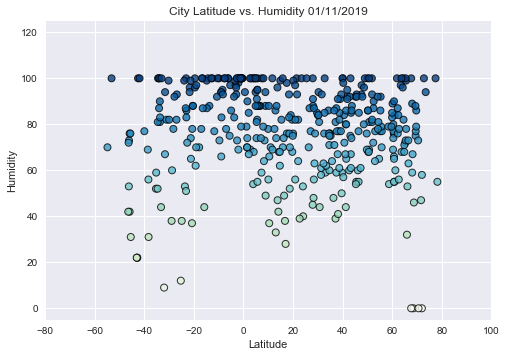

In [19]:
#Build a scatter plot for Latitude vs. Humidity

plt.scatter(new_cities_df["Lat"], 
            new_cities_df["Humidity"], c=new_cities_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

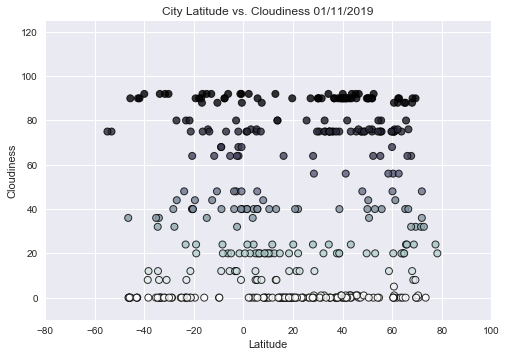

In [20]:
#Build a scatter plot for Latitude vs. Cloudiness

plt.scatter(new_cities_df["Lat"], 
            new_cities_df["Cloudiness"], c=new_cities_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

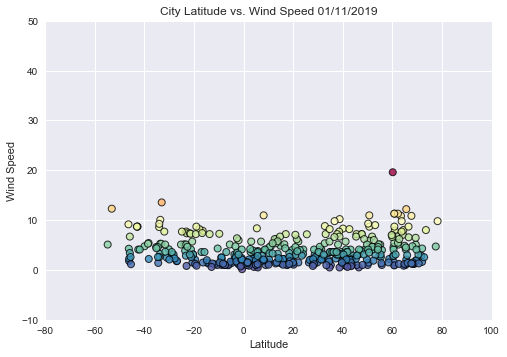

In [22]:
#Build a scatter plot for Latitude vs. Wind Speed

plt.scatter(new_cities_df["Lat"], 
            new_cities_df["Wind Speed"], c=new_cities_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()